upoading dataset

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving winequalityN.csv to winequalityN.csv


Import Section

In [ ]:
import pandas as pd #to read from excel
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns

from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings

from sklearn.preprocessing import KBinsDiscretizer

from sklearn.decomposition import PCA 

from sklearn.model_selection import train_test_split#to split training and testing sample

from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

Loading the dataset

In [ ]:
dataset=pd.read_csv("winequalityN.csv")#loading the dataset
dataset.isnull().sum()#checking for null values

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
dataset.update(dataset.fillna(dataset.mean()))#removing the numerical null values using mean value, and fillna is used to fill empty values
dataset.isnull().sum()#rechecking number of empty cells

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
features=['fixed acidity','volatile acidity','citric acid','chlorides','alcohol','residual sugar','pH','density','sulphates','free sulfur dioxide','total sulfur dioxide']#input values to the model-not all the attributes are chosen
x=dataset[features]
y=dataset['quality'] 

Oversampling

In [ ]:
warnings.filterwarnings('ignore')
# to supress the depreciated function usage warnings

counter=Counter(y)
print("Before:",counter)
smt=SMOTE(k_neighbors=2,sampling_strategy="all")
x,y=smt.fit_resample(x,y)
counter=Counter(y)
print("After:",counter)

Before: Counter({6: 2836, 5: 2138, 7: 1079, 4: 216, 8: 193, 3: 30, 9: 5})
After: Counter({6: 2836, 5: 2836, 7: 2836, 8: 2836, 4: 2836, 3: 2836, 9: 2836})


Dimensionality Reduction

In [ ]:
# pca=PCA(n_components=2)
# new_x=pca.fit_transform(x)
# priniciple_components=pd.DataFrame(data=new_x,columns=["PC1","PC2"])
# y=pd.DataFrame(data=y,columns=["quality"])
# x=priniciple_components
# ds=pd.concat([priniciple_components,y],axis=1)
# print("A part of the projected dataset:\n",ds.head(5),"\n")


Discretization

In [ ]:
# dis=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='uniform')
# x=dis.fit_transform(x)

END OF PREPROCESSING

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.30,random_state=42,shuffle=True)

Ensemble Technique : Random Forest

Confusion matrix for the Random forest with 85 trees:



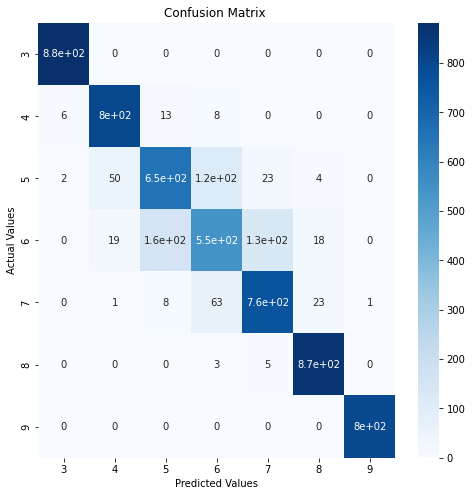



Confusion matrix for the Random forest with 86 trees:



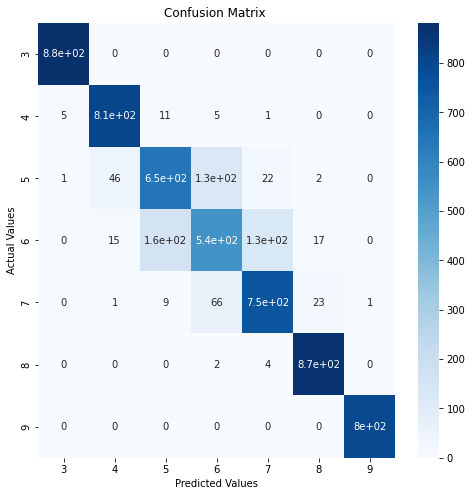



Confusion matrix for the Random forest with 87 trees:



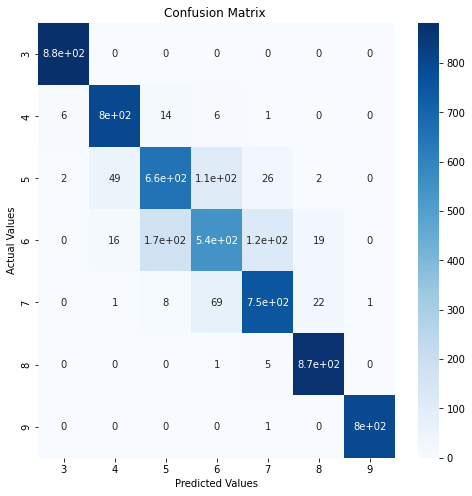



Confusion matrix for the Random forest with 88 trees:



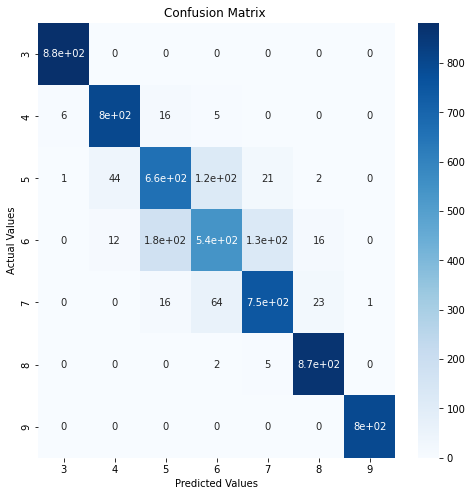



Confusion matrix for the Random forest with 89 trees:



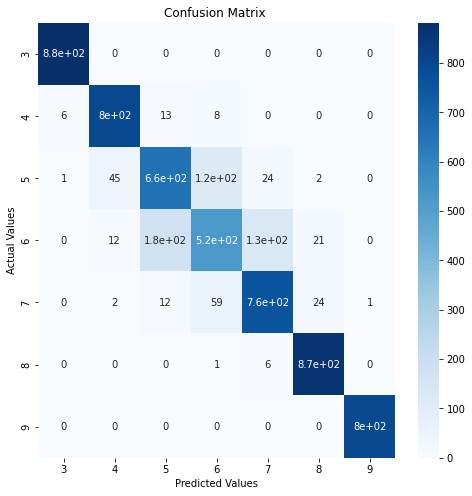



Confusion matrix for the Random forest with 90 trees:



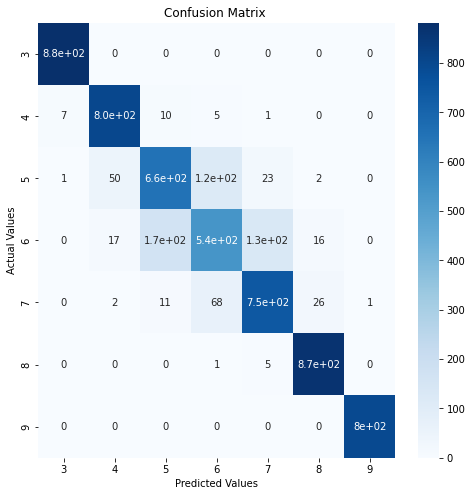



Confusion matrix for the Random forest with 91 trees:



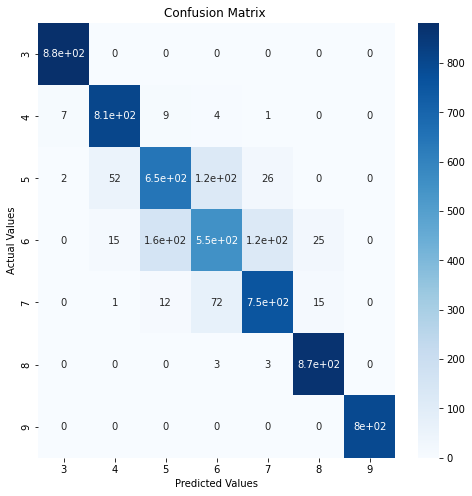



Confusion matrix for the Random forest with 92 trees:



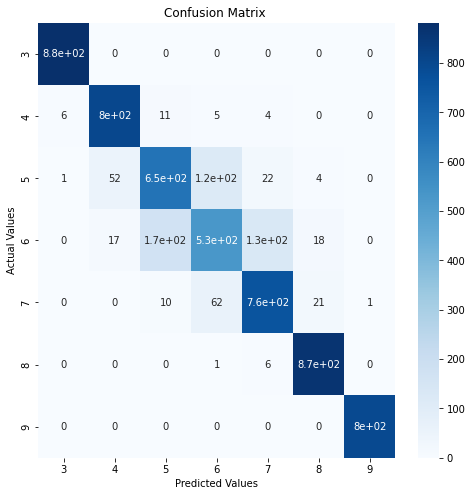



Confusion matrix for the Random forest with 93 trees:



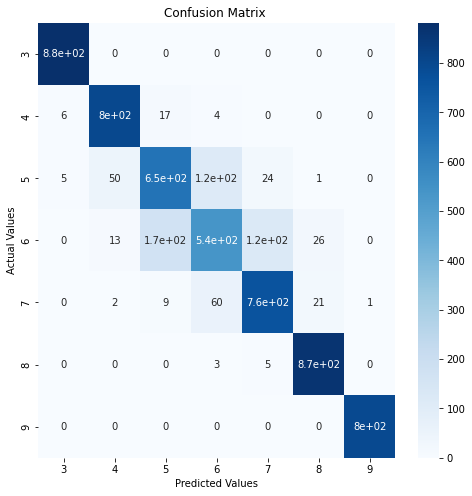



Confusion matrix for the Random forest with 94 trees:



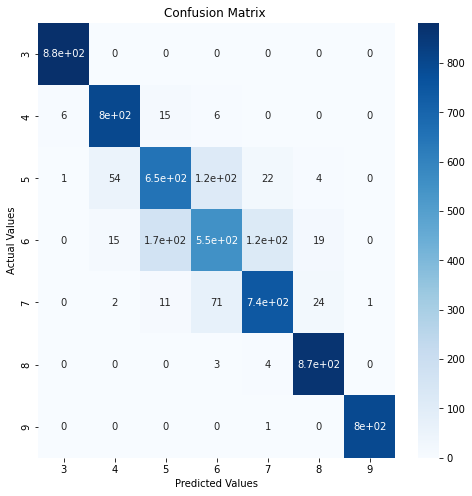



Confusion matrix for the Random forest with 95 trees:



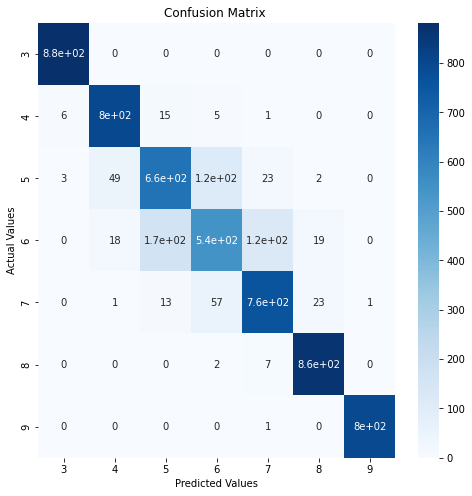



Confusion matrix for the Random forest with 96 trees:



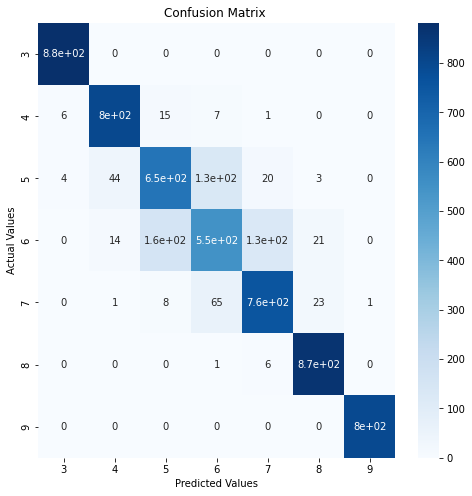



Confusion matrix for the Random forest with 97 trees:



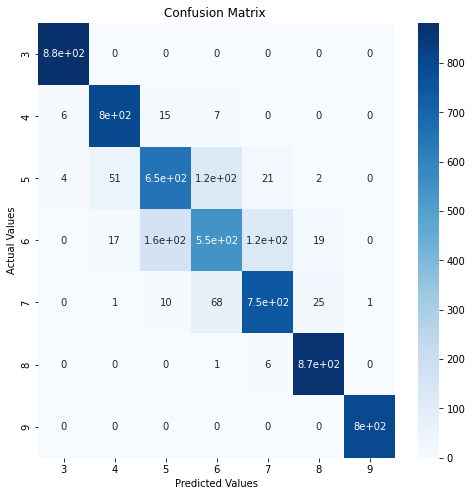



Confusion matrix for the Random forest with 98 trees:



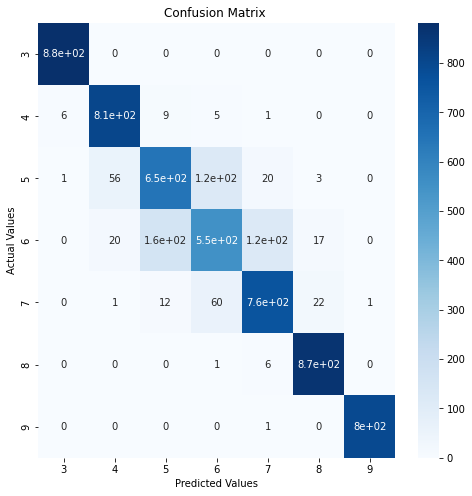



Confusion matrix for the Random forest with 99 trees:



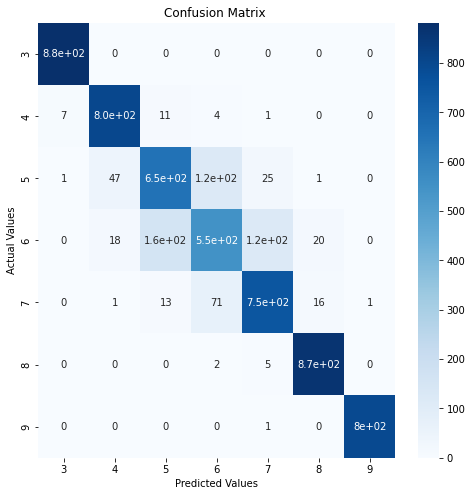



Confusion matrix for the Random forest with 100 trees:



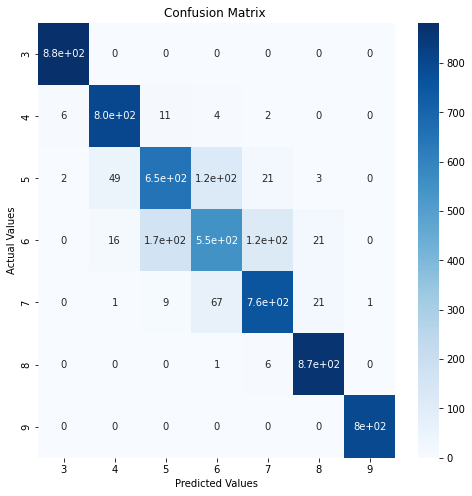



Confusion matrix for the Random forest with 101 trees:



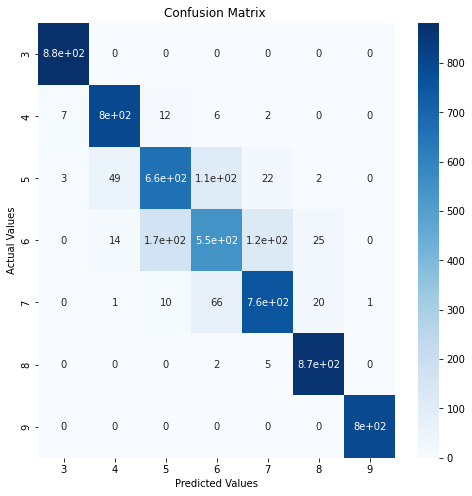



Confusion matrix for the Random forest with 102 trees:



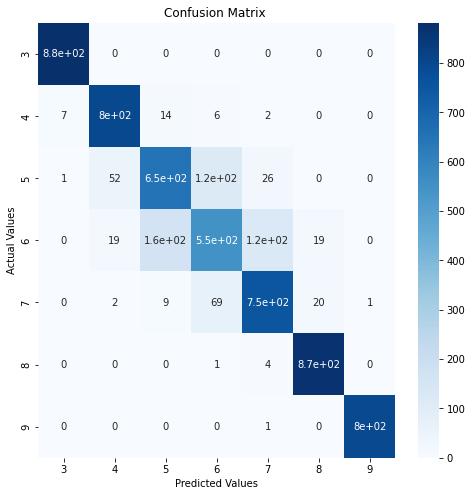



Confusion matrix for the Random forest with 103 trees:



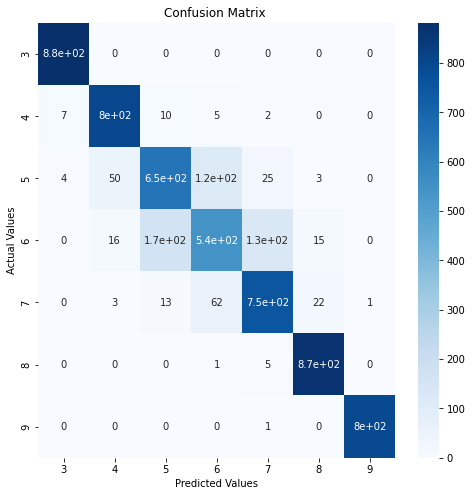



Confusion matrix for the Random forest with 104 trees:



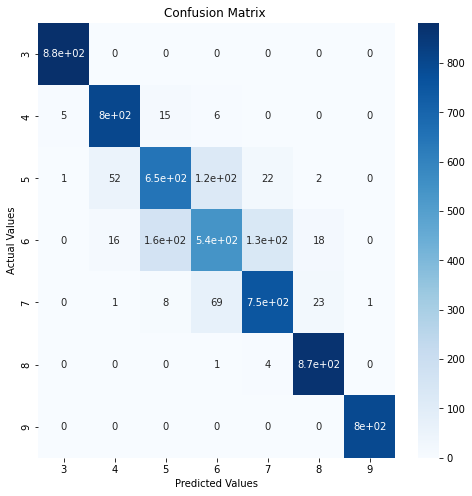



Confusion matrix for the Random forest with 105 trees:



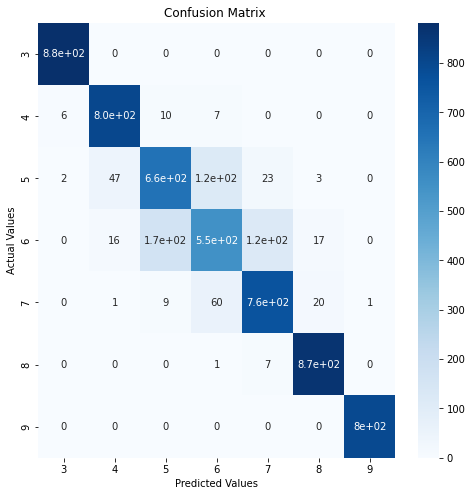



Confusion matrix for the Random forest with 106 trees:



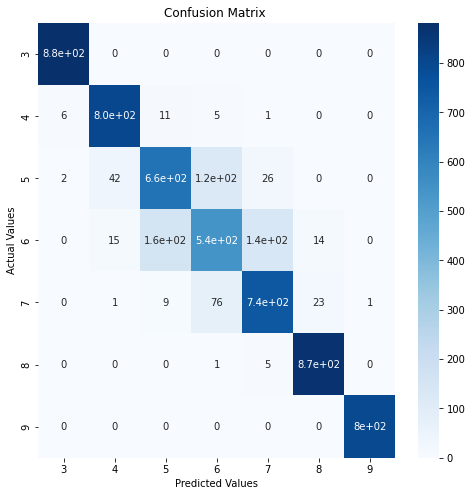



Confusion matrix for the Random forest with 107 trees:



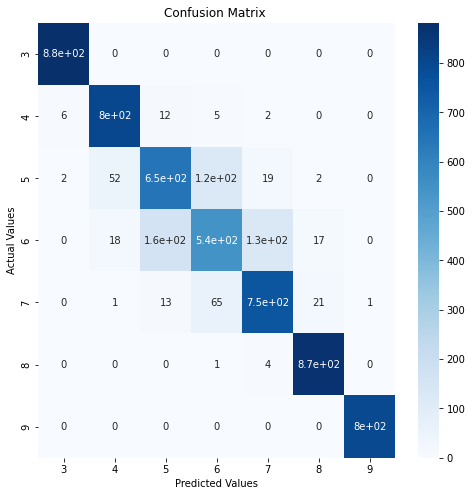



Confusion matrix for the Random forest with 108 trees:



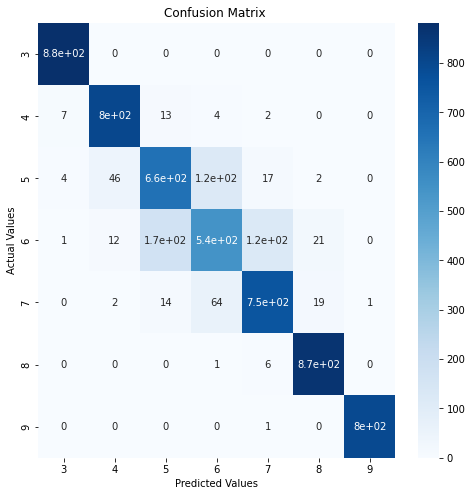



Confusion matrix for the Random forest with 109 trees:



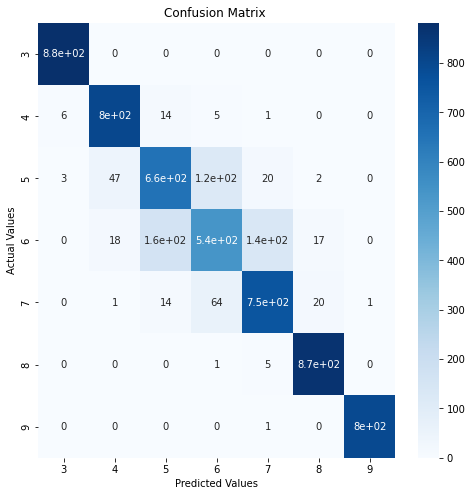



Confusion matrix for the Random forest with 110 trees:



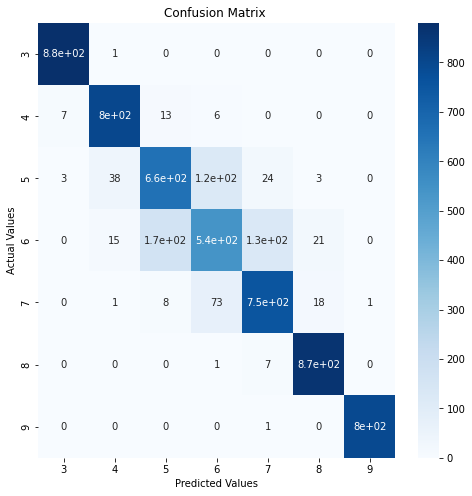



Confusion matrix for the Random forest with 111 trees:



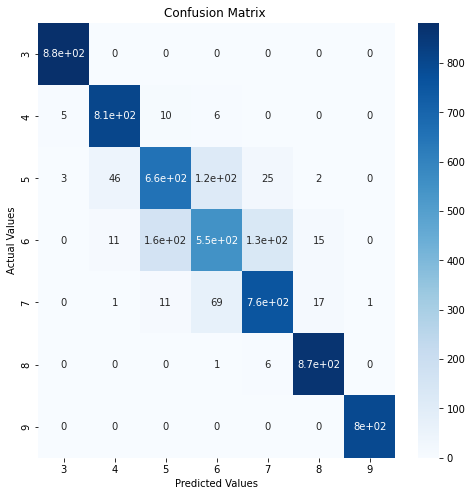



Confusion matrix for the Random forest with 112 trees:



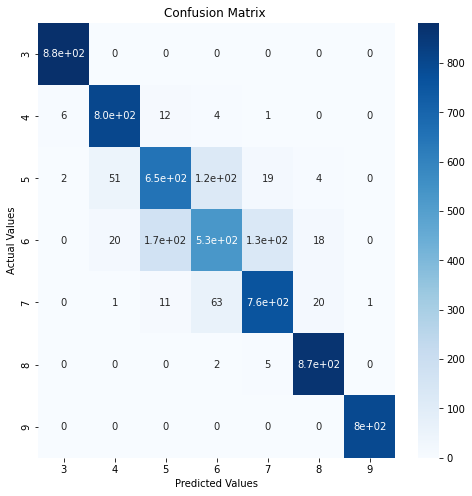



Confusion matrix for the Random forest with 113 trees:



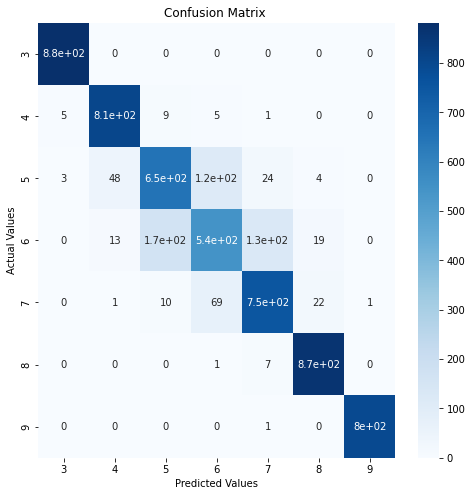



Confusion matrix for the Random forest with 114 trees:



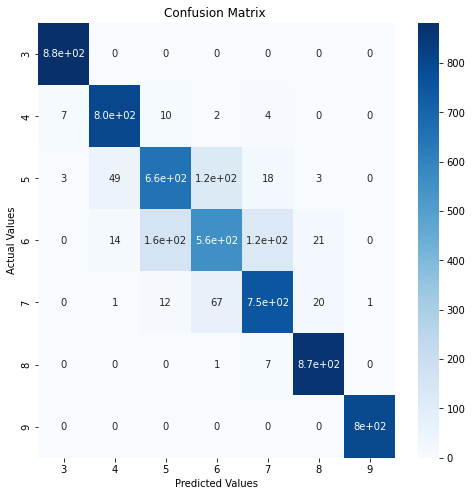



Confusion matrix for the Random forest with 115 trees:



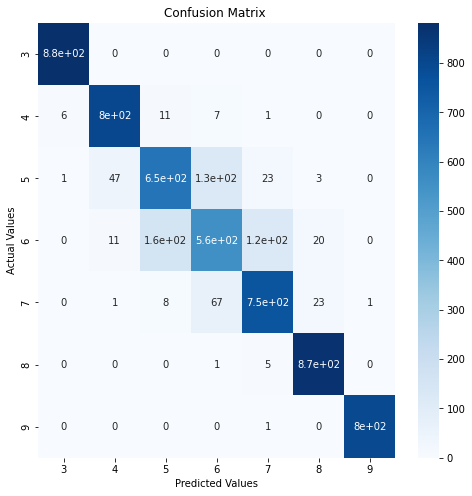



Confusion matrix for the Random forest with 116 trees:



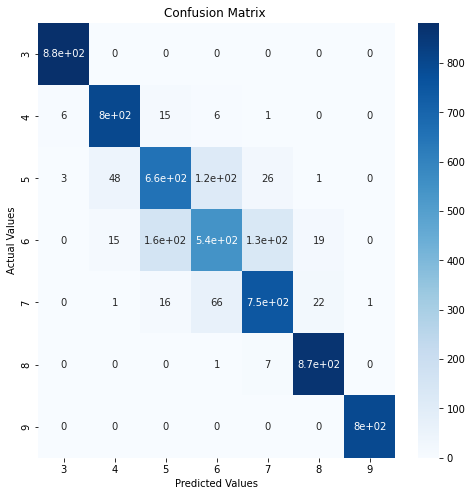



Confusion matrix for the Random forest with 117 trees:



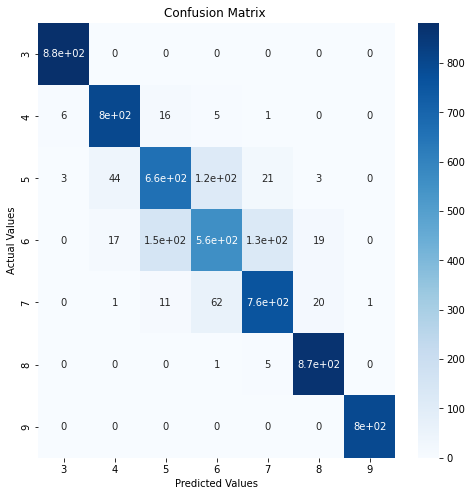



Confusion matrix for the Random forest with 118 trees:



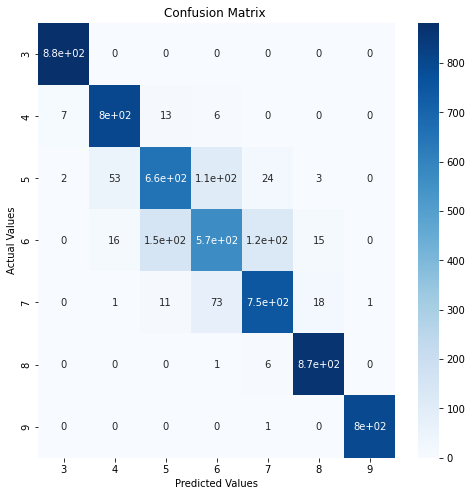



Confusion matrix for the Random forest with 119 trees:



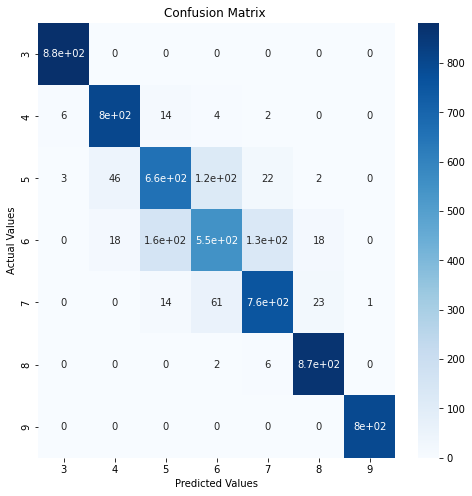



Confusion matrix for the Random forest with 120 trees:



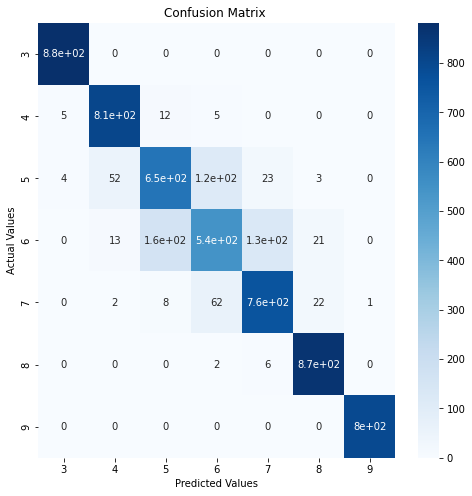



  num_estimators    Accuracy    Precision    Recall
----------------  ----------  -----------  --------
              85     89.0531      88.7651   89.1756
              86     88.9691      88.6768   89.0939
              87     89.0027      88.7259   89.1244
              88     88.9691      88.7235   89.094
              89     88.7508      88.4639   88.8822
              90     88.8348      88.5314   88.9623
              91     89.0698      88.7743   89.1922
              92     88.8516      88.5505   88.9792
              93     88.9859      88.6912   89.1106
              94     88.9019      88.6242   89.0216
              95     89.0363      88.7675   89.1589
              96     88.9523      88.6733   89.0717
              97     88.8684      88.5747   88.9905
              98     89.1538      88.858    89.2749
              99     89.0866      88.8135   89.2082
             100     89.137       88.8469   89.2595
             101     89.2042      88.9267   89.3263
           

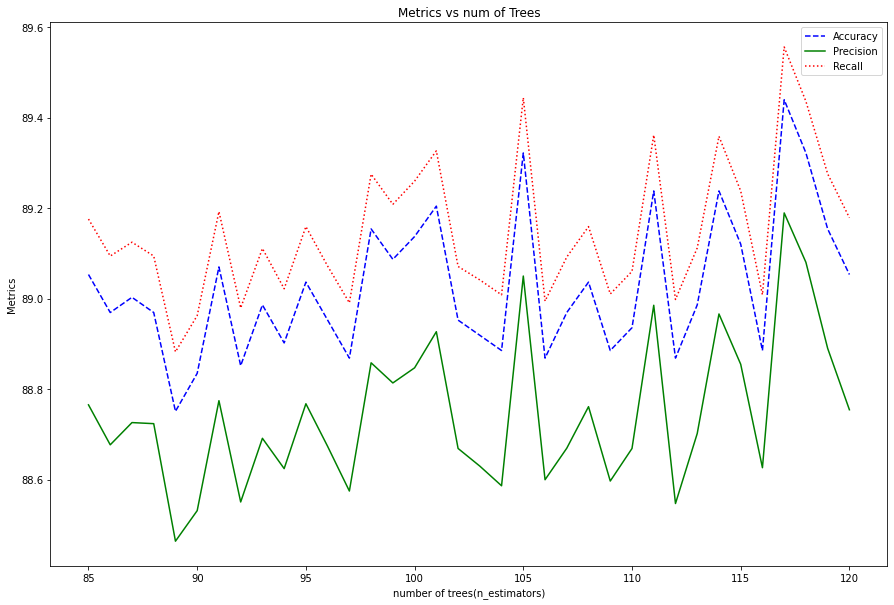

In [ ]:
accuracy=[]
precision=[]
recall=[]
start=85
end=121
increment=1

def confusion(test_y,pred_y):
  cm=metrics.confusion_matrix(test_y,pred_y,)
  #Datatframe to plot confusion matrix
  df=pd.DataFrame(cm,index=['3','4','5','6','7','8','9'],columns=['3','4','5','6','7','8','9'])
  plt.figure(figsize=(8,8))
  sns.heatmap(df,annot=True,cmap='Blues')
  st='Confusion Matrix '
  plt.title(st)
  plt.ylabel('Actual Values')
  plt.xlabel('Predicted Values')
  plt.show()
  print("\n")

table=[]
def res(model,xin,yin,xtest,ytest,numTree):
  model.fit(xin,yin)
  y_pred=model.predict(xtest)
  print("Confusion matrix for the Random forest with", str(numTree) ,"trees:\n")
  confusion(test_y,y_pred)
  acc=100*metrics.accuracy_score(ytest,y_pred)
  accuracy.append(acc)
  prec=100*metrics.precision_score(ytest,y_pred,average="macro",zero_division=1)#macro tells to find unweighted avg
  precision.append(prec)
  rec=100*metrics.recall_score(ytest,y_pred,average="macro",zero_division=1)
  recall.append(rec)
  table.append([numTree,acc,prec,rec])



def modelDefinition(numTree):
  model=RandomForestClassifier(n_estimators=numTree)
  model=res(model,train_x,train_y,test_x,test_y,numTree)

for i in range(start,end,increment):
  modelDefinition(i)
print(tabulate(table,headers=["num_estimators","Accuracy","Precision","Recall"]))


plt.figure(figsize=(15,10))
plt.plot(range(start,end,increment),accuracy,color='blue',linestyle='dashed',markersize=10,label="Accuracy")
plt.plot(range(start,end,increment),precision,color='green',linestyle='solid',markersize=10,label="Precision")
plt.plot(range(start,end,increment),recall,color='red',linestyle='dotted',markersize=10,label="Recall")

plt.title('Metrics vs num of Trees')
plt.xlabel('number of trees(n_estimators)')
plt.ylabel('Metrics')

leg = plt.legend();



Ensemble Technique : ADABOOST

In [ ]:
dis=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='uniform')
x1=dis.fit_transform(x)
train_x1,test_x1,train_y1,test_y1=train_test_split(x1,y,test_size=0.30,random_state=42,shuffle=True)


  num_estimators    Mean Accuracy
----------------  ---------------
              20          39.0866
              21          39.5903
              22          39.1706
              23          38.8348
              24          39.4392
              25          40.178
              26          39.9429
              27          39.6239
              28          39.6407
              29          39.9933
              30          39.3889
              31          38.7005
              32          38.7173
              33          38.6501
              34          39.7246
              35          39.6407
              36          40.0269
              37          40.0101
              38          40.3962
              39          40.3459
              40          40.9167
              41          41.3868
              42          41.4876
              43          42.0081
              44          42.1256
              45          41.8066
              46          41.5883
              4

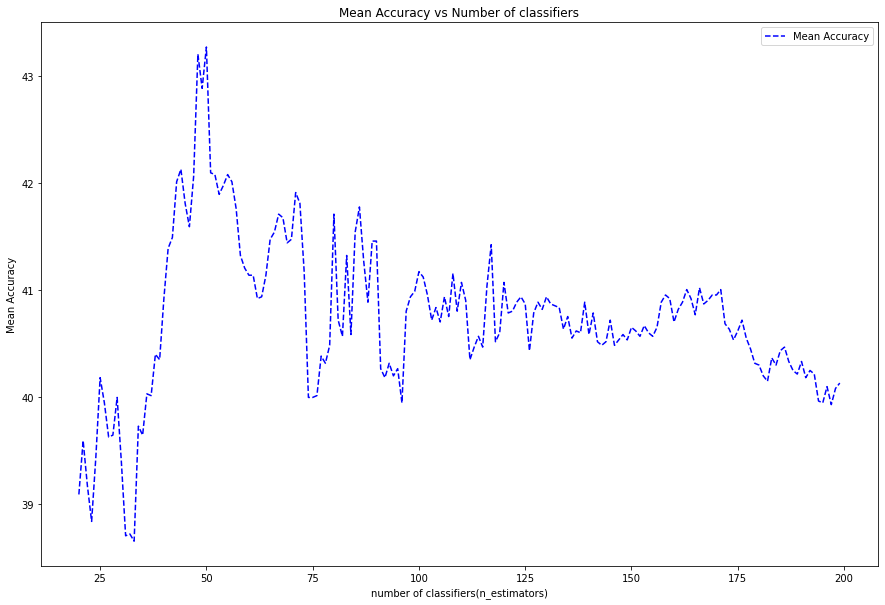

In [ ]:
start=20
end=200
increment=1
avg_acc=[]
table1=[]
# defalut is decision tree classifier as base classifier is not set in adaboost,hence discretizing before classification
# not changing the defalut classifier as it gave better performance among the others previously
# without discretising the performance was even worse(around 30%)


for i in range(start,end,increment):
  adb_clf=AdaBoostClassifier(n_estimators=i,learning_rate=0.2,random_state=42)
  adb_clf.fit(train_x1,train_y1)
  acc=100*adb_clf.score(test_x1,test_y1)
  avg_acc.append(acc)
  table1.append([i,acc])

print(tabulate(table1,headers=["num_estimators","Mean Accuracy"]))


plt.figure(figsize=(15,10))
plt.plot(range(start,end,increment),avg_acc,color='blue',linestyle='dashed',markersize=10,label="Mean Accuracy")

plt.title('Mean Accuracy vs Number of classifiers')
plt.xlabel('number of classifiers(n_estimators)')
plt.ylabel('Mean Accuracy')

leg = plt.legend();


Ensemble Technique : BAGGING

14.286 % complete
42.857 % complete
71.429 % complete
  num_estimators    Mean Accuracy
----------------  ---------------
              85          86.9711
              86          87.1222
              87          87.0551
              88          87.1558
              89          87.0383
              90          86.9711
              91          87.0551
              92          87.0383
              93          87.1054
              94          87.1558
              95          87.1726
              96          87.1558
              97          87.1054
              98          87.1054
              99          87.0551
             100          87.1054
             101          87.1054
             102          87.1726
             103          87.2901
             104          87.1558
             105          87.1726
             106          87.0887
             107          87.139
             108          87.1894
             109          87.0551
             110          87.

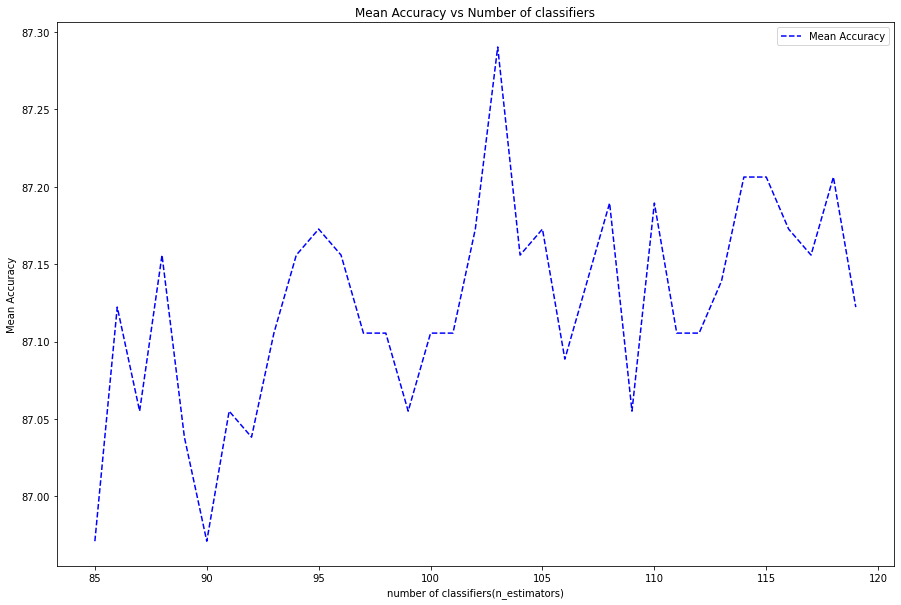

In [ ]:
# Difference between bagging and random forest
# In bagging the individual decison trees are made independently and thus may have higher correlation between the trees formed.
# When the trees are built in bagging at each split point the algoritm knows of all the attributes and their values(may result in 
# correlated trees)
# Random forest is an update to bagging wherein the trees are formed in such a way that there is lesser correaltion between the 
# decision trees formed and this helps in making a more meaningful and better prediction.When the trees are built in random forest at
# each split point the algoritm knows only about a sample of attributes.  

# performance similar to Randomforest

start=85
end=120
increment=1
avg_acc=[]
table1=[]
# defalut is decision tree classifier as base classifier is not set in bagging
# not changing the defalut classifier as it gave better performance among the others 


for i in range(start,end,increment):
  if (i%10)==0:
    print(round(100*(i-start)/(end-start),3),"% complete")
  bagging_clf=BaggingClassifier(n_estimators=i,random_state=42)
  bagging_clf.fit(train_x,train_y)
  acc=100*bagging_clf.score(test_x,test_y)
  avg_acc.append(acc)
  table1.append([i,acc])

print(tabulate(table1,headers=["num_estimators","Mean Accuracy"]))

plt.figure(figsize=(15,10))
plt.plot(range(start,end,increment),avg_acc,color='blue',linestyle='dashed',markersize=10,label="Mean Accuracy")

plt.title('Mean Accuracy vs Number of classifiers')
plt.xlabel('number of classifiers(n_estimators)')
plt.ylabel('Mean Accuracy')

leg = plt.legend();
